In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt

%matplotlib inline

In [46]:
import matplotlib 

# matplotlib.font_manager._rebuild()
plt.rc("font", family="Malgun Gothic")

plt.rc("axes", unicode_minus=False)

In [47]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


In [48]:
df = pd.read_csv(r'C:\Users\park\Documents\data_set\한국언론진흥재단_뉴스빅데이터_메타데이터_코로나_20200831.csv', encoding = 'cp949')

df.shape

(108947, 18)

In [49]:
df.head(1)

,주소,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,개체명(인물),개체명(지역),개체명(기업/기관),키워드,특성추출,본문,원본주소
0,http://www.bigkinds.or.kr/news/newsDetailView....,20200801.0,경기일보,임진흥 기자,"의왕시, 청소년 랜선 트롯 가요제 개최",문화>전시_공연,NaN,NaN,NaN,NaN,NaN,NaN,의왕시 의왕학생축제,진로 의왕학생동아리연합회 의왕시장 의왕시,"의왕시,청소년,랜선,트롯,가요,개최,의왕시,코로나,장기,진로체험,문화,활동,청소년들...","의왕시,온라인,실시간,의왕,가요제,엔터테이너,dream,오프라인,김상돈,유튜브,트롯...",의왕시는 코로나 19 장기화로 진로체험 및 문화 활동이 어려운 청소년들을 위해 진로...,www.kyeonggi.com/news/articleView.html idxno=2...


<AxesSubplot:>

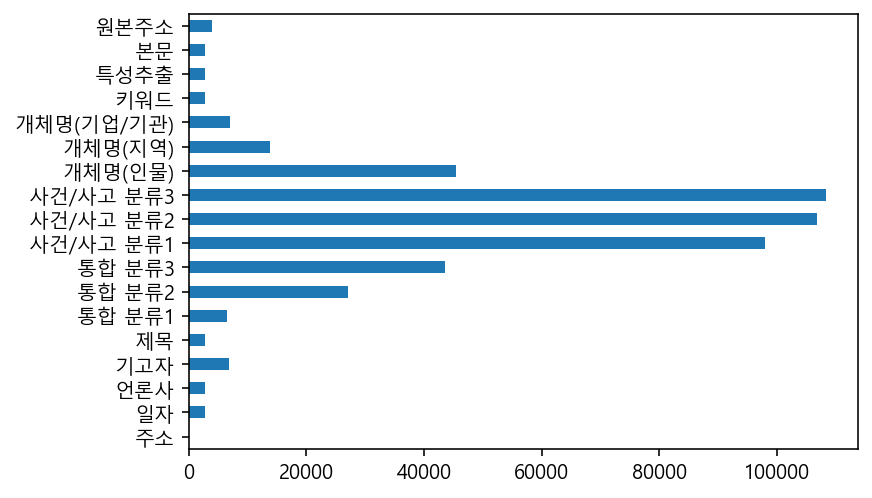

In [50]:
df.isna().sum().plot.barh()

In [51]:
n = df.isna().sum()
not_use = n.sort_values(ascending = False).head(11)
not_use

사건/사고 분류3     108347
사건/사고 분류2     106835
사건/사고 분류1      97929
개체명(인물)        45428
통합 분류3         43626
통합 분류2         27065
개체명(지역)        13910
개체명(기업/기관)      7049
기고자             6888
통합 분류1          6601
원본주소            3984
dtype: int64

In [52]:
not_use_cols = not_use.index

In [53]:
df = df.drop(not_use_cols, axis=1).copy()

In [85]:
df['일자'].value_counts().sort_values(ascending = False)

20200824.0    6140
20200825.0    6077
20200827.0    5858
20200820.0    5807
20200819.0    5779
20200826.0    5653
20200818.0    5498
20200831.0    5444
20200821.0    4903
20200828.0    4254
20200803.0    3374
20200813.0    3356
20200805.0    3317
20200804.0    3296
20200812.0    3293
20200806.0    3289
20200817.0    3195
20200811.0    3178
20200823.0    3035
20200814.0    2876
20200810.0    2812
20200830.0    2733
20200807.0    2482
20200822.0    1846
20200802.0    1579
20200809.0    1529
20200816.0    1414
20200829.0    1385
20200815.0    1236
20200801.0     852
20200808.0     600
Name: 일자, dtype: int64

In [73]:
df['키워드'] = df['키워드'].str.lower()

In [74]:
keyword = df['키워드'].unique().tolist()

In [75]:
keyword = str(keyword)
keyword[:100]

"['의왕시,청소년,랜선,트롯,가요,개최,의왕시,코로나,장기,진로체험,문화,활동,청소년들,진로,멘토링,학생축제,온라인,진행,31일,의왕시,dream,air,이름,전국,진행,멘토링,실"

In [76]:
keyword_count = pd.Series(keyword.split(',')).value_counts().copy()

<AxesSubplot:>

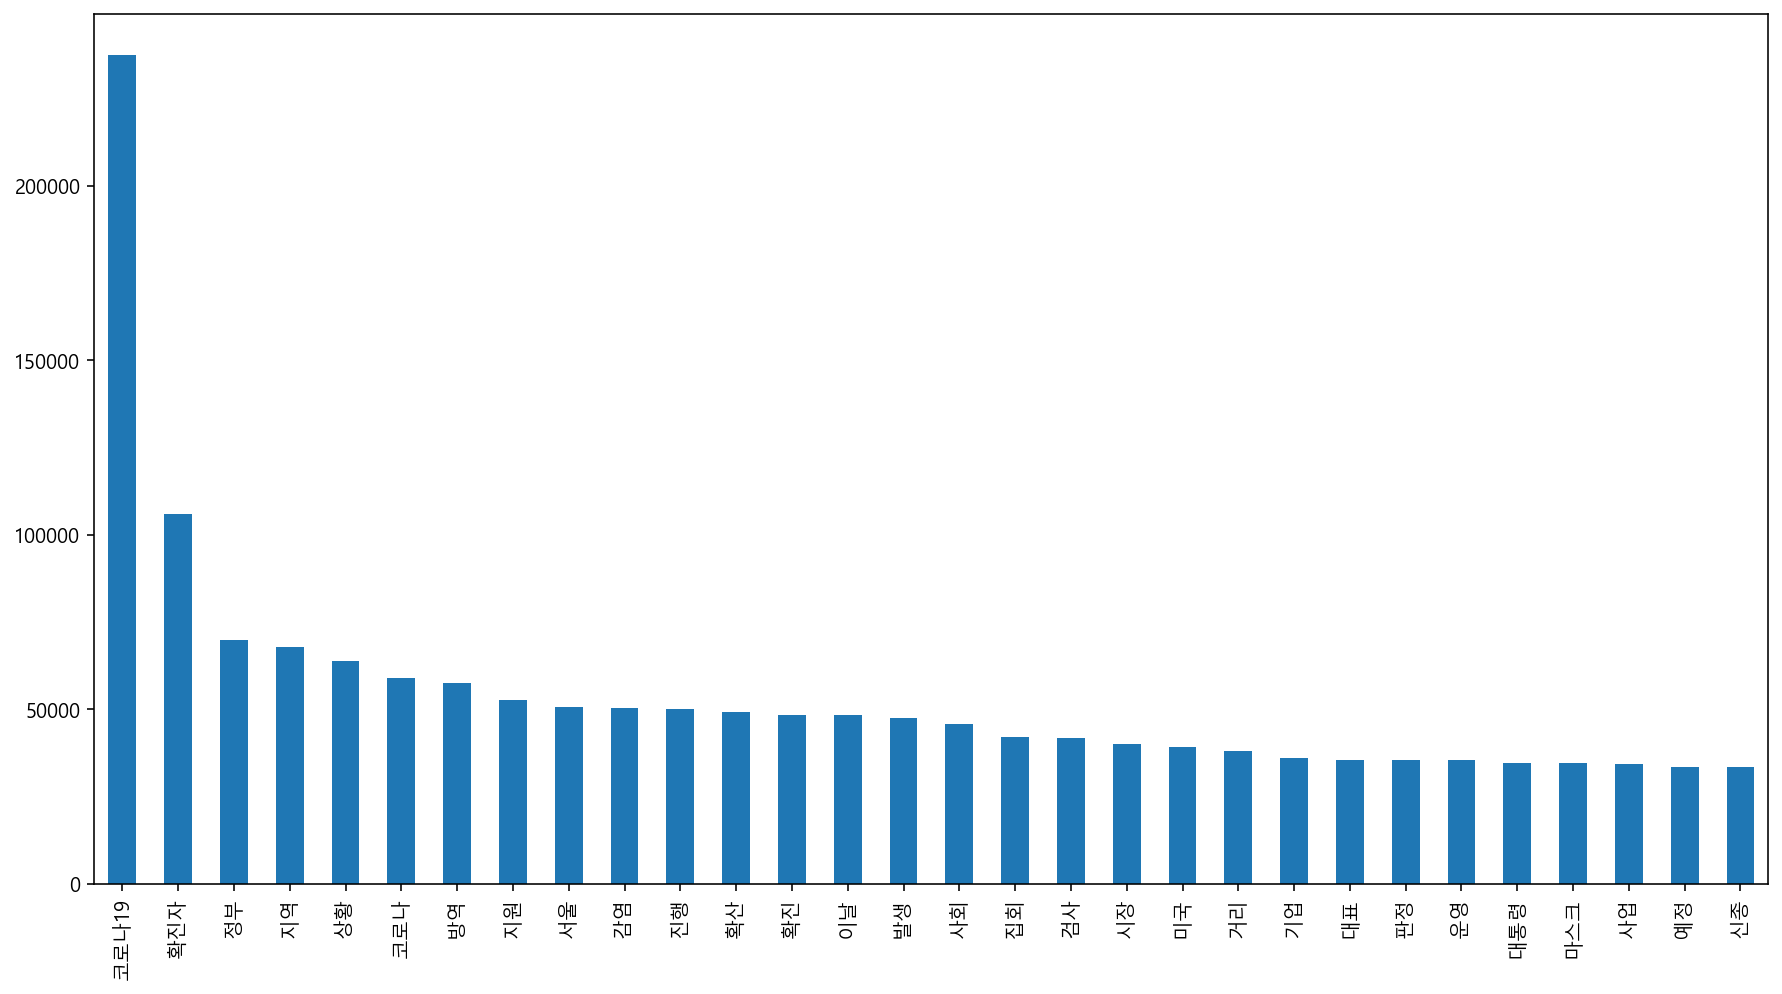

In [82]:
keyword_count.head(30).plot.bar(figsize=(15,8))

In [80]:
from wordcloud import WordCloud

def wordcloud(data, width = 1200, height =500):
    word_draw = WordCloud(font_path = r'C:\Windows\Fonts\malgun.ttf',
                stopwords = ['신종 코로나바이러스','포함','6월','정도','얘기','결국','만큼','동기 대비','8월'],
                background_color = 'white',
                width = width, height= height,
                         random_state = 42)
                
    word_draw.generate(data)

    plt.figure(figsize=(20,10))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

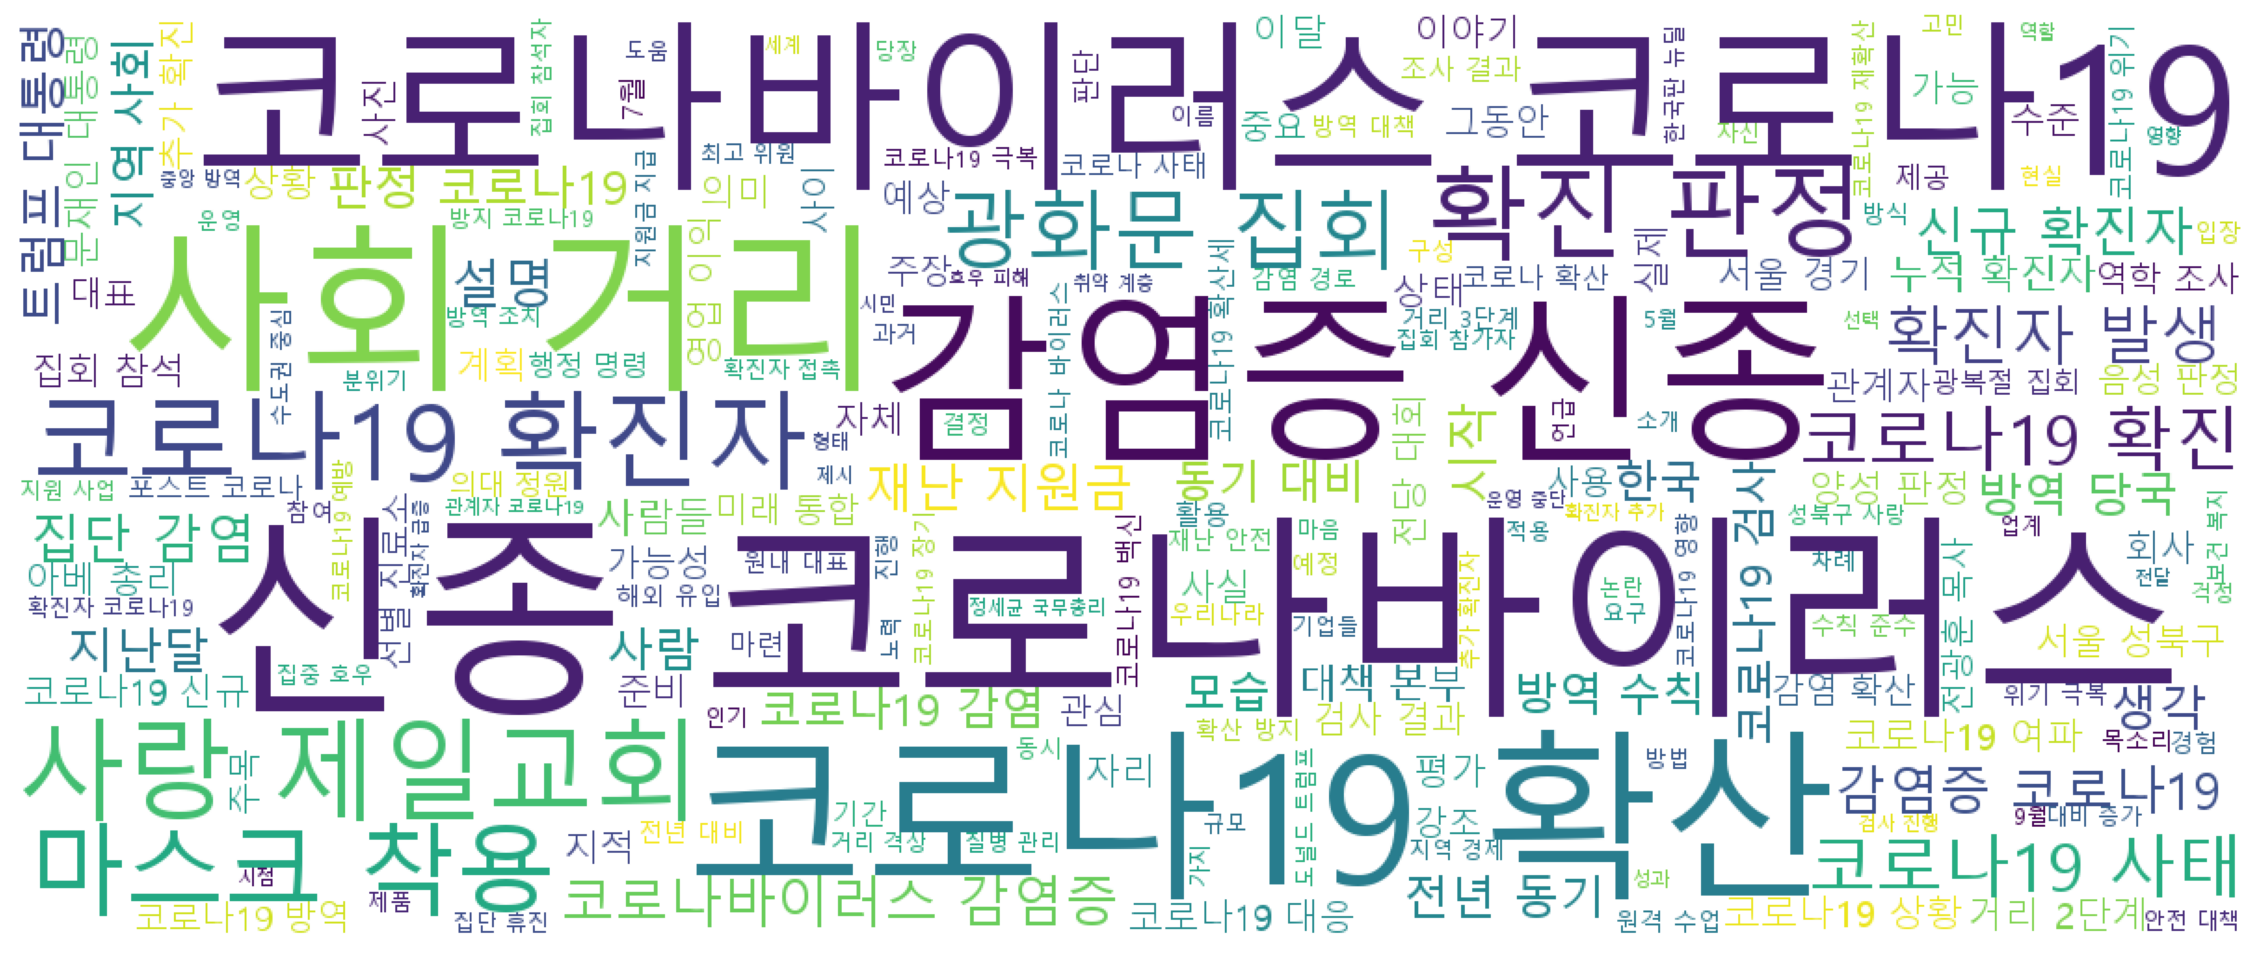

In [81]:
wordcloud(keyword)